In [25]:
import intake
import xarray as xr
import matplotlib.pyplot as plt

In [23]:
xr.set_options(keep_attrs =True)

In [2]:
col = intake.open_esm_datastore(
    "htmip_catalog.json",
)
col

,unique
source,1
temporal,2
variable,138
ens,10
simulation,2
experiment,1
path,2879
derived_variable,0


In [3]:
cat = col.search(
    variable='ta',
    simulation = 'NoVolc',
    temporal = 'Monthlymean'
)
cat

,unique
source,1
temporal,1
variable,1
ens,10
simulation,1
experiment,1
path,10
derived_variable,0


In [19]:
def preprocess(ds):
    ds = ds.rename({'T': 'ta'})
    #ds['ta'].attrs['units'] = 'K'
    #ds['ta'].attrs['long_name'] = 'temperature'
    return ds

In [20]:
dsets = cat.to_dataset_dict(
    cdf_kwargs={'use_cftime': True, 'chunks': {'ens': 1}},
    preprocess = preprocess
    #xarray_combine_by_coords_kwargs = dict()
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'source.temporal.simulation.ens.experiment'


In [22]:
ds_wo = xr.concat([dsets[i] for i in dsets], dim = 'ens')
ds_wo

<xarray.Dataset>
Dimensions:    (lat: 192, ens: 10, lon: 288, lev: 70, ilev: 71, time: 120,
                nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev        (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
  * ilev       (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 967.5 985.1 1e+03
  * time       (time) object 2022-02-01 00:00:00 ... 2032-01-01 00:00:00
  * ens        (ens) int64 3 8 6 10 4 1 5 7 9 2
Dimensions without coordinates: nbnd
Data variables:
    gw         (ens, lat) float64 dask.array<chunksize=(1, 192), meta=np.ndarray>
    hyam       (ens, lev) float64 dask.array<chunksize=(1, 70), meta=np.ndarray>
    hybm       (ens, lev) float64 dask.array<chunksize=(1, 70), meta=np.ndarray>
    P0         (ens) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05 1e+05
    hyai       (ens, ilev) float64 dask.array<chunksize=(1, 71), meta=np.ndarray>
    hybi       (ens, ilev) float64 dask.array<chunksize=(1, 71), meta=np.ndarray>
    time_bnds  (ens, time, nbnd) object dask.array<chunksize=(1, 120, 2), meta=np.ndarray>
    PS         (ens, time, lat, lon) float32 dask.array<chunksize=(1, 120, 192, 288), meta=np.ndarray>
    ta         (ens, time, lev, lat, lon) float32 dask.array<chunksize=(1, 120, 70, 192, 288), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                     CF-1.0
    source:                          CAM
    case:                            b.e22.cesm2.2.2.BWHIST.f09_g17.honga_ton...
    logname:                         xinyuew
    host:                            derecho3
    initial_file:                    /glade/campaign/acom/acom-climate/tilmes...
    ...                              ...
    intake_esm_attrs:ens:            3
    intake_esm_attrs:simulation:     NoVolc
    intake_esm_attrs:experiment:     Exp1and4
    intake_esm_attrs:path:           /gws/nopw/j04/htmip/Exp1and4_coupledocea...
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          WACCM6MAM.Monthlymean.NoVolc.3.Exp1and4

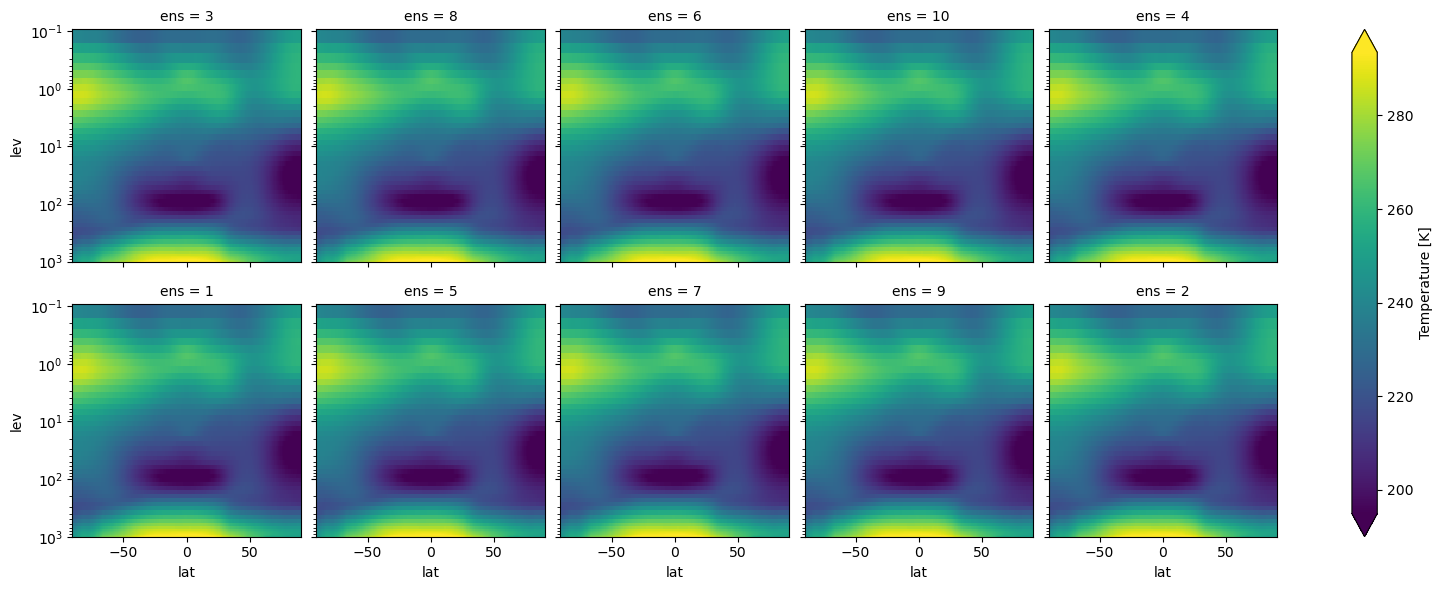

In [28]:
ds_wo['ta'].isel(time = 0).sel(lev = slice(0.1,None)).mean('lon').plot(
    col = 'ens',
    x = 'lat', 
    robust = True, 
    col_wrap = 5,
    yincrease = False
)
plt.yscale('log')